In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Python strip() 方法用于移除字符串头尾指定的字符（默认为空格或换行符）或字符序列。
with open('2lenses.txt', 'r') as fr:  #加载文件
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]  #处理文件，把文档中的字符串提取出来，保持行列关系

lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate', 'category']  #特征标签
lenses_list = [] #保存lenses数据的临时列表
lenses_dict = {} #保存lenses数据的字典，用于生成pandas数据结构DataFrame
for each_label in lensesLabels: #提取信息，生成字典
    for each in lenses:          #0 1 2 3 4
        lenses_list.append(each[lensesLabels.index(each_label)])
    #lenses_list  长列表
    lenses_dict[each_label] = lenses_list
    #重置
    lenses_list = []
#print(lenses_dict)

lenses_pd = pd.DataFrame(lenses_dict) #生成pandas.DataFrame
#print(lenses_pd) #打印pandas.DataFrame
le = LabelEncoder() #创建LabelEncoder()对象，用于序列化
for col in lenses_pd.columns[:-1]: #序列化
    lenses_pd[col] = le.fit_transform(lenses_pd[col])
print(lenses_pd) #打印编码（序列号）信息

    age  prescript  astigmatic  tearRate   category
0     2          1           0         1  no lenses
1     2          1           0         0       soft
2     2          1           1         1  no lenses
3     2          1           1         0       hard
4     2          0           0         1  no lenses
5     2          0           0         0       soft
6     2          0           1         1  no lenses
7     2          0           1         0       hard
8     0          1           0         1  no lenses
9     0          1           0         0       soft
10    0          1           1         1  no lenses
11    0          1           1         0       hard
12    0          0           0         1  no lenses
13    0          0           0         0       soft
14    0          0           1         1  no lenses
15    0          0           1         0  no lenses
16    1          1           0         1  no lenses
17    1          1           0         0  no lenses
18    1     

In [ ]:
双层循环训练不同test_size情况下的模型
使用clf.score()获得每次循环的模型准确率
将得到的模型准确率添加至列表中
计算不同test_size下的准确率的标准差
计算不同test_size下的准确率的平均值
柱状图的绘制
柱形图上数值的显示
图像标题、轴标签、图例的设置

## 分割数据、创建树并进行预测
根据0.1~0.9的分割比分割数据<p>
每个分割比下进行了100次试验

In [45]:

from sklearn.model_selection import train_test_split
Score = []
for i in range(1,10,1):   #0~9
    Score.append([])
    for j in range(100):  # 一组100个
        pd_train,pd_test = train_test_split(lenses_pd, test_size=i/10)
        clf = tree.DecisionTreeClassifier(max_depth = 4) #创建DecisionTreeClassifier()类
        clf = clf.fit(pd_train.iloc[:,:-1].values.tolist(), 
                  pd_train.iloc[:,-1].values.tolist()) #使用训练数据（pd_train, tg_train），构建决策树
        score = clf.score(pd_test.iloc[:,:-1].values.tolist(), 
                  pd_test.iloc[:,-1].values.tolist())
        
        Score[i-1].append(score)

## 计算不同分割比的均值和方差

In [46]:
mean1 = np.mean(Score[0])
mean1

0.78

In [19]:
import numpy as np
std_all = list(np.zeros(9))
for i in range(9):
    std_all[i] = np.std(Score[i],ddof=1)  #0 总体  1 样本

#每个size对应的准确率的平均值
mean = np.mean(Score,axis=1)
mean


array([0.78666667, 0.796     , 0.77625   , 0.753     , 0.73916667,
       0.674     , 0.66941176, 0.5635    , 0.49909091])

In [47]:
std_all

[0.20932256722405848,
 0.1657063241357609,
 0.11690316937577445,
 0.12508986668581415,
 0.13538768791200834,
 0.15852717179566053,
 0.16229023908246454,
 0.13959808832009934,
 0.16034596122470693]

In [48]:
x=[x for x in range(1,10)]
x

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
x  =11.21
round(x,1)

11.2

In [49]:

res=list(map(lambda x:round(x,1),[i*0.1 for i in range(1,10)]))
res

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [65]:

std_show = []
for i in range(9):
    std_show.append(mean[i] + 0.5 *std_all[i])

In [66]:
std_show

[0.8913279502786958,
 0.8788531620678803,
 0.8347015846878872,
 0.8155449333429071,
 0.806860510622671,
 0.7532635858978303,
 0.7505568842471146,
 0.6332990441600497,
 0.5792638897032626]

## 绘图

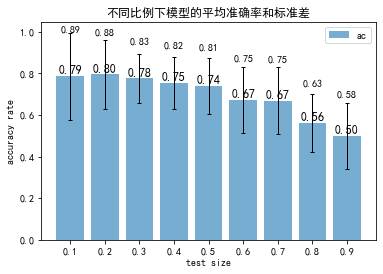

In [81]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
error_params = dict(elinewidth=1,ecolor='black',capsize=2)
x=[x for x in range(1,10)]
x_label=list(map(lambda x:round(x,1),[i*0.1 for i in range(1,10)]))
y=mean

plt.bar(x,y,yerr=std_all,error_kw=error_params,tick_label=x_label,alpha=0.6 )
for a,b in zip(x,y):   #柱子上的数字显示  准确率
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=12);
    
for a,b in zip(x,std_show):   #柱子上的数字显示 标准差
    plt.text(a,b+0.1,'%.2f'%b,ha='center',va='bottom',fontsize=10);
      
plt.title('不同比例下模型的平均准确率和标准差')
plt.xlabel('test size')
plt.ylabel('accuracy rate')
plt.legend(['ac'])
plt.show()